# Assignment 1: Approximation of mathematical functions

In [38]:
import math
import numpy
import matplotlib.pyplot as plt
%matplotlib inline

## Question 1: Approximating $\log$

Function $\log$ is defined on positive real numbers: $\log(x): \mathcal{R}^+ \rightarrow \mathcal{R}$. The Taylor series for $\log$ has [the following form](https://en.wikipedia.org/wiki/Logarithm):

\begin{align}\log (x)  &= \frac{(x-1)^1}{1} - \frac{(x-1)^2}{2} + \frac{(x-1)^3}{3} - \frac{(x-1)^4}{4} + \cdots \\
&= \sum_{n=1}^\infty (-1)^{n+1}\frac{(x-1)^n}{n}
\end{align}

and converges to $\log$ for $0 < x < 2$. 

1. Implement `log1` that approximates $\log(x),\,0 < x < 2$. 



In [39]:
def log1(x,n):
  v = x - 1
  for i in range(2,n+1):
    v += (((-1)**(i+1))*((x-1)**i))/i
  return v

 2. * Plot  `math.log` and `log1` for $0.25 ≤ x ≤ 4$ for $n=1,2,4,8$.   
    * Plot the **absolute** error of `log1` compared to `math.log` on $0.01 ≤ x ≤ 1$ for $n=1,8$. Use [plt.plot](https://matplotlib.org/3.5.1/api/_as_gen/matplotlib.pyplot.plot.html): 

   


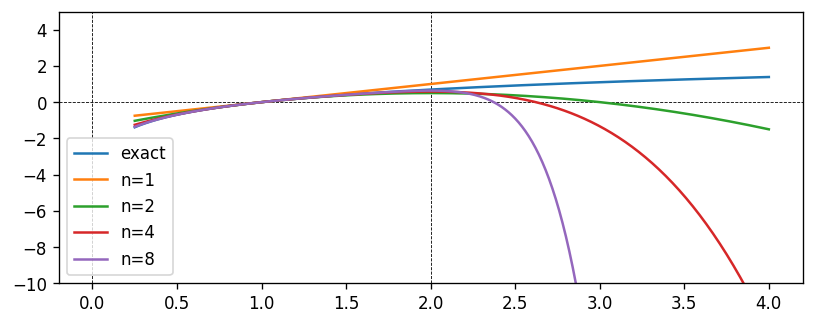

In [40]:
arrX = numpy.arange(0.25,4.01,0.01)

arr = []
arr1 = []
arr2 = []
arr4 = []
arr8 = []

for x in arrX:
  arr.append(math.log(x))
  arr1.append(log1(x,1))
  arr2.append(log1(x,2))
  arr4.append(log1(x,4))
  arr8.append(log1(x,8))

plt.figure(figsize=(8, 3)).set_dpi(120)
plt.axhline(0, ls='--', c='black', lw=0.5)
plt.axvline(0, ls='--', c='black', lw=0.5)
plt.axvline(2, ls='--', c='black', lw=0.5)
plt.ylim(-10,5)

plt.plot(arrX,arr,label="exact")
plt.plot(arrX,arr1,label="n=1")
plt.plot(arrX,arr2,label="n=2")
plt.plot(arrX,arr4,label="n=4")
plt.plot(arrX,arr8,label="n=8")
plt.legend()

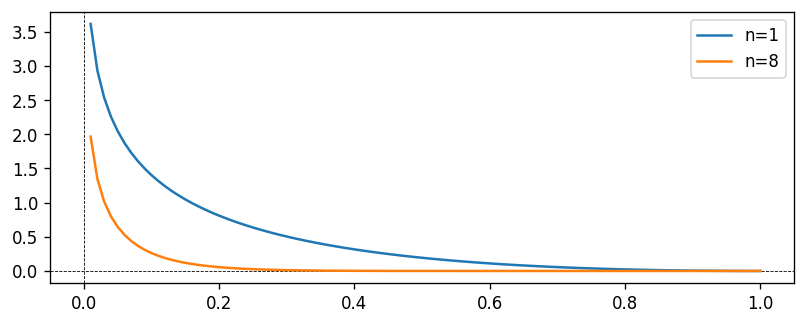

In [41]:
arrX = numpy.arange(0.01,1.01,0.01)

arrE1 = []
arrE8 = []

for x in arrX:
  arrE1.append(abs(math.log(x)-log1(x,1)))
  arrE8.append(abs(math.log(x)-log1(x,8)))

plt.figure(figsize=(8, 3)).set_dpi(120)
plt.axhline(0, ls='--', c='black', lw=0.5)
plt.axvline(0, ls='--', c='black', lw=0.5)

plt.plot(arrX,arrE1,label="n=1")
plt.plot(arrX,arrE8,label="n=8") 
plt.legend()

3. Implement `log2` that approximates $\log(x),\,0 < x < \infty$. _Hint:_ $\log (e^N\cdot x) = N + \log x$.


In [42]:
e = math.e

def log2(x, n):
  i = 0
  while x > math.exp(i):
    i += 1
  x /= math.exp(i)
  i += log1(x,n)
  return i

def log3(x,n):
  val = 0
  N = 0
  while x >= 2:
    x = x/e
    N += 1
  return N+log1(x,n)

 4. * Plot  `math.log` and `log2` for $0.1 ≤ x ≤ 100$ for $n=1,2,4,8$.   
    * Plot the **relative** error of `log2` compared to `math.log` on $0.1 ≤ x ≤ 100$ for $n=1,8$. Use [plt.plot](https://matplotlib.org/3.5.1/api/_as_gen/matplotlib.pyplot.plot.html): 



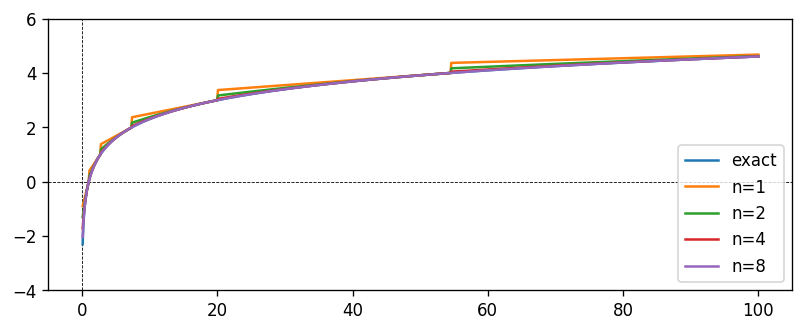

In [43]:
arrX = numpy.arange(0.1,100.1,0.1)

arr = []
arr1 = []
arr2 = []
arr4 = []
arr8 = []

for x in arrX:
  arr.append(math.log(x))
  arr1.append(log2(x,1))
  arr2.append(log2(x,2))
  arr4.append(log2(x,4))
  arr8.append(log2(x,8))

plt.figure(figsize=(8, 3)).set_dpi(120)
plt.axhline(0, ls='--', c='black', lw=0.5)
plt.axvline(0, ls='--', c='black', lw=0.5)
plt.ylim(-4,6)

plt.plot(arrX,arr,label="exact")
plt.plot(arrX,arr1,label="n=1")
plt.plot(arrX,arr2,label="n=2")
plt.plot(arrX,arr4,label="n=4")
plt.plot(arrX,arr8,label="n=8")
plt.legend()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


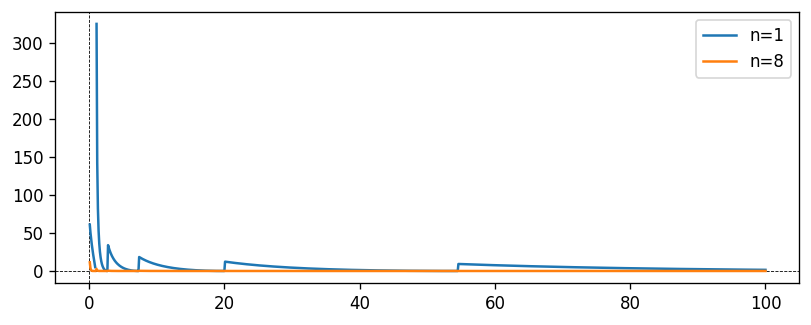

In [44]:
arrX = numpy.arange(0.1,100.1,0.1)

arrE1 = []
arrE8 = []

for x in arrX:
  v1 = math.log(x)
  v2 = log2(x,1)
  v3 = log2(x,8)
  arrE1.append(abs((v1-v2)/v1*100))
  arrE8.append(abs((v1-v3)/v1*100))

plt.figure(figsize=(8, 3)).set_dpi(120)
plt.axhline(0, ls='--', c='black', lw=0.5)
plt.axvline(0, ls='--', c='black', lw=0.5)

plt.plot(arrX,arrE1,label="n=1")
plt.plot(arrX,arrE8,label="n=8") 
plt.legend()

5. What are the maximum absolute and relative errors of `log1` compared to `log2` on interval $0.25 ≤ x ≤ 1.75$? 

In [45]:
arrX = numpy.arange(0.25,1.76,0.01)

arrAbsolute = []
arrRelative  = []

for x in arrX:
  v1 = log1(x,1)
  v2 = log2(x,1)
  arrAbsolute.append(abs(v1-v2))
  arrRelative.append(abs((v1-v2)/v1*100))

print(f"maximum absolute error : {max(arrAbsolute)}")
print(f"maximum relative error : {max(arrRelative)} %")

maximum absolute error : 0.3678794411714419
maximum relative error : 5.52260571392324e+16 %


## Question 2: Using approximate versions of  $\log$ and $\exp$

1. Use `logfact`  from [lecture 1 notebook](https://colab.research.google.com/drive/1PS2XZEKAhsV7Wq97Szk1RH93HWuhTyYF) with `math.log` and `math.exp`, to implement the [multinomial coefficients](https://en.wikipedia.org/wiki/Multinomial_theorem#Multinomial_coefficients) for $m=3$ on the log scale:

$$\binom{n}{k_1,k_2,...,k_m} = \frac{n!}{k_1! k_2! \cdot\cdot\cdot k_m!}$$


In [46]:
def logfact(n):
  logf = 0
  for i in range(n):
    logf += math.log(i + 1)
  return logf

def multinomialCoefficients(k1,k2,k3):
  return round(math.exp(logfact(k1+k2+k3) - (logfact(k1)+logfact(k2)+logfact(k3))))

2. Use `log2` from question 1 and `exp2` from the [lecture 2 notebook](https://colab.research.google.com/drive/1PAXmH_v6sQmbmAYrRK48eCfFQWLcQO3K) to implement the approximate computation of the multinomial coefficients for $m=3$:


In [47]:
e = math.e

def exp(x, n):
    v = 1     
    xi = x   
    fact = 1    
    for i in range(1, n+1):
        fact *= i      
        v += xi/fact   
        xi *= x        
    return v    

def exp2(x, n):
  v = 1
  if x > 1:
    pow = int(x)   
    v *= e**pow    
    x -= pow       
  elif x < -1:
    pow = int(-x)
    v /= e**pow
    x += pow
  v *= exp(x, n)                     
  return v

def logfact1(N, n):
  logf = 0
  for i in range(N):
    logf += log2(i + 1,n)
  return logf

def multinomialCoefficients1(k1,k2,k3,n):
  return round(exp2(logfact1(k1+k2+k3,n) - (logfact1(k1,n)+logfact1(k2,n)+logfact1(k3,n)),n))

3. Compute $\binom{10}{2,2,6}$, and $\binom{150}{100, 25,25}$. Compare the running times of `multinomial coefficients` using `log2` and `exp2` vs. `math.log` and `math.exp`.


In [48]:
%time print(multinomialCoefficients(2,2,6))
%time print(multinomialCoefficients1(2,2,6,16))
print("--")
%time print(multinomialCoefficients(100,25,25))
%time print(multinomialCoefficients1(100,25,25,16))

1260
CPU times: user 836 µs, sys: 0 ns, total: 836 µs
Wall time: 885 µs
1260
CPU times: user 859 µs, sys: 0 ns, total: 859 µs
Wall time: 1.48 ms
--
2544476232379045785963458409835886714436879363285712896
CPU times: user 629 µs, sys: 0 ns, total: 629 µs
Wall time: 642 µs
2544098954975020007784575007553601957721973070567047168
CPU times: user 3.32 ms, sys: 0 ns, total: 3.32 ms
Wall time: 3.32 ms


4. What are the absolute and relative error of `multinomial coefficients` for each combination of arguments — $\binom{10}{2,2,6}$, and $\binom{150}{100, 25,25}$?


In [49]:
v1 = multinomialCoefficients(2,2,6)
v2 = multinomialCoefficients1(2,2,6,16)
print(f"absolute error (n=10) : {abs(v1-v2)}")
print(f"relative error (n=10) : {abs(v1-v2)/v1*100} %")

v3 = multinomialCoefficients(100,25,25)
v4 = multinomialCoefficients1(100,25,25,16)
print(f"absolute error (n=150) : {abs(v3-v4)}")
print(f"relative error (n=150) : {abs(v3-v4)/v3*100} %")

absolute error (n=10) : 0
relative error (n=10) : 0.0 %
absolute error (n=150) : 377277404025778178883402282284756714906292718665728
relative error (n=150) : 0.014827310989383056 %


5. For which $n$(number of Taylor series terms) the absolute difference between the *relative errors* of $\binom{1000}{900, 50,50}$ computed for `n` and `n+1` is smaller than 0.1%? Use the approximation from Q2.2 

In [50]:
v = multinomialCoefficients(900,50,50)
absoluteDifference = 1
n = 0

while absoluteDifference >= 0.1:
  n += 1
  v1 = multinomialCoefficients1(900,50,50,n)
  v2 = multinomialCoefficients1(900,50,50,n+1)
  absoluteDifference = abs((abs(v2-v)/v*100) - (abs(v1-v)/v*100))

print(n)

13
